<a href="https://colab.research.google.com/github/scontractor/Python_Workshop_Colab/blob/main/PythonIntroML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

Today is the day! Finally, you will enter the mystical magical world of Machine Learning. Let us begin!!!

In today's workshop, we will introduce you to two famous Machine Learning models. The first one is **K-Nearest-Neighbour** and the second one is a __Decision Tree Model__. In this workshop, everything you have learned so far in the previous weeks will come together. This means that you not only have to use NumPy, but also Pandas functionalities. But don't worry, as responsible tutors, we will stand on your side. :)

Comments for slides:

- What is Machine Learning

- Training vs Testing
- Models
    - KNN 
    - Decision Tree
    
- Evaluation
    - Accuracy 
    
- Optimisation
    - Hyper Parameter

- Overfitting vs. Underfitting

## Installing the packages

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

## Breast Cancer Detection

Now, we work with the Breast Cancer Wisconsin (Diagnostic) Database. The goal is to create a classifier that can with the diagnosis of patients. 

### Download the data

In [ ]:
from sklearn.datasets import load_breast_cancer

# Loads the breast cancer dataset
cancer = load_breast_cancer() 

# Dataset description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

### Great! We have downloaded the cancer dataset. Let's deep dive into it!

In [ ]:
print("Let's print the dataset")
print(cancer)
print(cancer.keys())
print(cancer['data'].shape)

Let's print the dataset
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1

In [ ]:
# First look at the features
print("The feature data looks like this: ")
print(cancer.data, "\n")  
print("The data type is: ")
print(type(cancer.data))
#print(cancer.data.shape)

print()
# Now, let's look at the labels / targets
print("The label data looks like this: ")
print(cancer.target, "\n")
print("The data type is: ")
print(type(cancer.target))
#print(cancer.target.shape)


The feature data looks like this: 
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] 

The data type is: 
<class 'numpy.ndarray'>

The label data looks like this: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1

### Before we start now, there 2 quick things to check/do. 

First of all, NumPy is cool, but let us work with Pandas. It is just way more comfy.. :)

And secondly, what does 0 and what does 1 mean...we should really understand our labelling before we do some predicting.



In [ ]:
# Converts the data into Pandas dataframe

# This will create a data frame with the cancer data and features as columns
df_cancer = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

print("Dataframe without label column")
print(df_cancer.shape, "\n")

# In order to get target as additional column we have to create a pandas series
df_cancer['target'] = pd.Series(cancer.target)

print("Dataframe with label column")
print(df_cancer.shape, "\n")

df_cancer.head(20) # Gives first rows of newly created DataFrame

Dataframe without label column
(569, 30) 

Dataframe with label column
(569, 31) 



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,0


In [ ]:
cancer_ser = df_cancer['target'].value_counts() # Creates a series which counts the number of 0 and 1s

print(type(cancer_ser))
cancer_ser

# Okay, now we actually know the share of our classes
# cancer_ser.rename(index = {1: 'benign', 0: 'malignant'}, inplace=True) # Changes the naming of the index
# print(cancer_ser)

<class 'pandas.core.series.Series'>


1    357
0    212
Name: target, dtype: int64

### Wicked! We will focus on the train and test split of our data

In [ ]:
# Download the train_test_split functionality
from sklearn.model_selection import train_test_split

# Preparing X and Y values
X = df_cancer.iloc[:, :-1]
y = df_cancer.iloc[:, -1]

print("Initial data dimensions")
print(X.shape)
print(y.shape, "\n")

# Creates four data sets with training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("After train / test split")
print(X_train.shape)
print(y_train.shape)


Initial data dimensions
(569, 30)
(569,) 

After train / test split
(426, 30)
(426,)


## Drum roll....It is time for K-Nearest-Neighbour!

### Model and Training

In [ ]:
# Install KNN model
from sklearn.neighbors import KNeighborsClassifier

# Defining neighbours
k = 1

# Creating a KNN model
knn = KNeighborsClassifier(n_neighbors = k) 

# Training the model with training data
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

### Prediction

Now, using then KNN classifier, we predict the class labels using the mean value for each feature.

In order to implement this, we will use `cancerdf.mean()[:-1].values.reshape(1, -1)` which gets the mean value for each feature, ignores the label column, and finally reshapes the data from 1 dimension to 2.

In [ ]:
# Creates the predictions based on the test set
y_pred = knn.predict(X_test)

print("Predictions are: ")
print(y_pred)
print(y_test)

Predictions are: 
[1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
512    0
457    1
439    1
298    1
37     1
      ..
236    0
113    1
527    1
76     1
162    0
Name: target, Length: 143, dtype: int64


### Evaluate The Prediction With Accuracy

In order to evalute the performance of the classifier, the score (mean accuracy) of the KNN classifier will be computed for  `X_test` and `y_test`.

In [ ]:
knn_acc = knn.score(X_test, y_test)

print(f"The accuracy of the KNN classifier is: {knn_acc}")

The accuracy of the KNN classifier is: 0.916083916083916


### Let us visualize this result (comparing training vs. testing)

Text(0.5, 1.0, 'Training and Test Accuracies for Malignant and Benign Cells')

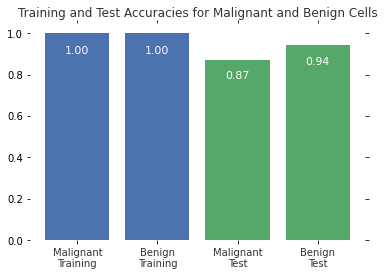

In [ ]:
mal_train_X = X_train[y_train==0]
mal_train_y = y_train[y_train==0]
ben_train_X = X_train[y_train==1]
ben_train_y = y_train[y_train==1]

mal_test_X = X_test[y_test==0]
mal_test_y = y_test[y_test==0]
ben_test_X = X_test[y_test==1]
ben_test_y = y_test[y_test==1]

scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
          knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


plt.figure()

# Plot the scores as a bar chart
bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

# directly label the score onto the bars
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                 ha='center', color='w', fontsize=11)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)

# Challenge I

As you know now, the KNN classifier has a hyper-parameter to tune. It's **K** value. In this first challenge, compute and plot the accuracy of the KNN performance for the values k: {1,2,3,4,5,6,7,8,9,10}

**What is the best K-value for your model ?**

[0.916083916083916, 0.9020979020979021, 0.9230769230769231, 0.9230769230769231, 0.9370629370629371, 0.9230769230769231, 0.9440559440559441, 0.9440559440559441, 0.958041958041958, 0.9440559440559441]


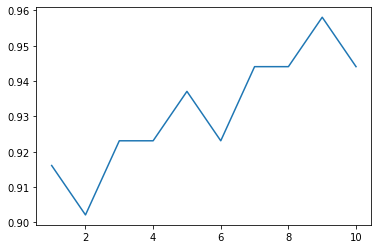

In [ ]:
# Your code here

# Declaring storing lists
k_list = range(1,11)
acc_list = []

for k in k_list:
    # Creating a KNN model
    knn = KNeighborsClassifier(n_neighbors = k) 

    # Training the model and computing its' scores
    knn.fit(X_train, y_train)
    knn_acc = knn.score(X_test, y_test)
    acc_list.append(knn_acc)
print(acc_list)
plt.plot(k_list, acc_list)

In [ ]:
# Write the k value with the best score
acc_arr = np.array(acc_list)
k = np.argmax(acc_arr) + 1 
# Hint
best_score = np.max(acc_arr)
print(f"The best score is: {best_score}" )
print(f"The best score, you get with k = {k}")

The best score is: 0.958041958041958
The best score, you get with k = 9


# We made it! Our first Machine Learning use case!


Now, it your turn to work on real life use case, tweark the data in the right manner and create a model. This time, you will use the Decision Tree model. Of course, you can also try the KNN model on this use case. 

# Challenge II 

Alright, this is quite an oldie but really important and cool. We will predict hand-written digits!


In [ ]:
from sklearn import datasets
digits = datasets.load_digits()

In [ ]:
# Dataset description
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

First, we want to know the dimensionality of the data. 

**What are the dimensions of digits.data?**

and **what are the dimensions of digits.targets?**

In [ ]:
# Here is your code
data_dim = digits.data.shape
print(f"The dimensions of our data is: {data_dim}")

target_dim = digits.target.shape
print(f"The dimensions of our data is: {target_dim}")

# Hint: Here is the data type of your data
type(digits.data)

print(digits.images[0].shape)

The dimensions of our data is: (1797, 64)
The dimensions of our data is: (1797,)
(8, 8)


**Let us quickly plot the data with the command below!**

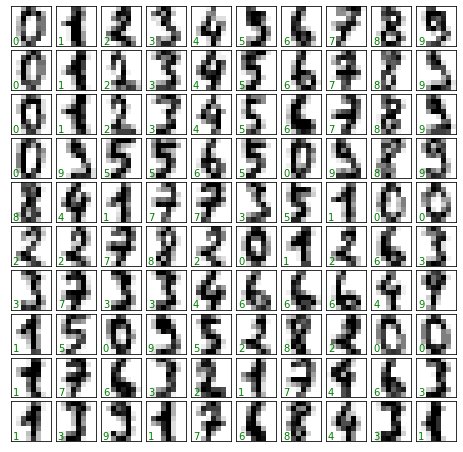

In [ ]:
# Just run the code
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

**Now create an np.array Y_digit which holds your labels, and further an np.array X_digit which holds the bit matrices. When you have the data seperately stored in X and Y, use the scikit function to split the data in a test and training set!**


In [ ]:
from sklearn.model_selection import train_test_split

X_digit = digits.data
Y_digit = digits.target

X_train, X_test, y_train, y_test = train_test_split(X_digit, Y_digit, random_state=0)

**In order to check the dimensions split of your training and test set, print the X_train and y_train dimension.**

**How big is your training set now?**

In [ ]:
dim_train =X_train.shape
print(f"The dimensions of my training set is: {dim_train}")


The dimensions of my training set is: (1347, 64)


## Decision Tree Classifier

This time, we will use a DT classifier to work with X_train and y_train

**Hint:** Here you will find the info how to set-up your Decision Tree in Sklearn: 

In [ ]:
# Laod the Decision Tree model from Sklearn
from sklearn.tree import DecisionTreeClassifier

### Create a Decision Tree model and train it with your training data (X_train, y_train)

In [ ]:
# Create a Decision Tree model instance 
# Your code here
dt_clf = DecisionTreeClassifier()

# Train your DT model
# Your code here
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Prediction of your Decision Tree model

In [ ]:
# Predict the classes for X_test and save it to y_pred
# Your code here
y_pred = dt_clf.predict(X_test)

**Let's have a closer look on our predictions. Plot the first element of X_test (this should be an image) and plot the first element of y_pred (this is an integer)** 

**Is the predictions accurate?**

**HINT 1:** The function in order to plot the image is: plt.imshow(first_X_value, cmap='binary', interpolation='nearest')

**HINT 2:** Maybe, you have to reshape the first element of your X_test

(64,)
(8, 8) 

The first prediction is a: 2 

The corresponding image is a: 


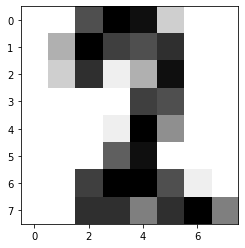

In [ ]:
# Your code here

print(X_test[0].shape)
X_first = X_test[0].reshape(8,8)
print(X_first.shape, "\n")

print(f"The first prediction is a: {y_pred[0]}", "\n")
print(f"The corresponding image is a: ")
plt.imshow(X_first, cmap='binary', interpolation='nearest')

### Evaluate your model 

In [ ]:
# Evaluate your predictions with y_test. What is your accuracy? --> Save your accuracy in variable dt_acc
from sklearn.metrics import accuracy_score

# Your code here
dt_acc = dt_clf.score(X_test, y_test)
print(f"Your DT model accuracy is: {dt_acc}")

Your DT model accuracy is: 0.8577777777777778


### We can see that our model has its limitations...

In [ ]:
print(f"This is our target test set: {y_test}", "\n")

print(f"This is our target prediction set: {y_pred}", "\n")

# We can see that the second element was not correctly predicted, the prediction says it is a 3, but it is actually a 3...damn it!

This is our target test set: [2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8 8 7 8 4 7 5 4 9 2 9 4 7 6 8 9 4 3
 1 0 1 8 6 7 7 1 0 7 6 2 1 9 6 7 9 0 0 5 1 6 3 0 2 3 4 1 9 2 6 9 1 8 3 5 1
 2 8 2 2 9 7 2 3 6 0 5 3 7 5 1 2 9 9 3 1 7 7 4 8 5 8 5 5 2 5 9 0 7 1 4 7 3
 4 8 9 7 9 8 2 6 5 2 5 8 4 8 7 0 6 1 5 9 9 9 5 9 9 5 7 5 6 2 8 6 9 6 1 5 1
 5 9 9 1 5 3 6 1 8 9 8 7 6 7 6 5 6 0 8 8 9 8 6 1 0 4 1 6 3 8 6 7 4 5 6 3 0
 3 3 3 0 7 7 5 7 8 0 7 8 9 6 4 5 0 1 4 6 4 3 3 0 9 5 9 2 1 4 2 1 6 8 9 2 4
 9 3 7 6 2 3 3 1 6 9 3 6 3 2 2 0 7 6 1 1 9 7 2 7 8 5 5 7 5 2 3 7 2 7 5 5 7
 0 9 1 6 5 9 7 4 3 8 0 3 6 4 6 3 2 6 8 8 8 4 6 7 5 2 4 5 3 2 4 6 9 4 5 4 3
 4 6 2 9 0 1 7 2 0 9 6 0 4 2 0 7 9 8 5 4 8 2 8 4 3 7 2 6 9 1 5 1 0 8 2 1 9
 5 6 8 2 7 2 1 5 1 6 4 5 0 9 4 1 1 7 0 8 9 0 5 4 3 8 8 6 5 3 4 4 4 8 8 7 0
 9 6 3 5 2 3 0 8 3 3 1 3 3 0 0 4 6 0 7 7 6 2 0 4 4 2 3 7 8 9 8 6 8 5 6 2 2
 3 1 7 7 8 0 3 3 2 1 5 5 9 1 3 7 0 0 7 0 4 5 9 3 3 4 3 1 8 9 8 3 6 2 1 6 2
 1 7 5 5 1 9] 

This is our target prediction set: [2 3 2 6 6 7 1 9 8 5

(8, 8) 

The second prediction is a: 3 

The corresponding image is a: 


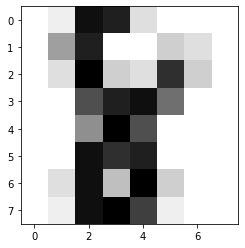

In [ ]:
X_second = X_test[1].reshape(8,8)
print(X_second.shape, "\n")

print(f"The second prediction is a: {y_pred[1]}", "\n")
print(f"The corresponding image is a: ")
plt.imshow(X_second, cmap='binary', interpolation='nearest')

### If you can create a KNN classifier and compute its performance for this task!

### Plot the second prediction, to see if  the classifier got it right!

In [ ]:
# This challenge is optional!

from sklearn.neighbors import KNeighborsClassifier

# Create the k value to be tested
k_list = range(3,5)
acc_list = []

for k in k_list:
    # Creating a KNN model
    knn = KNeighborsClassifier(n_neighbors = k) 

    # Training the model and computing its' scores
    knn.fit(X_train, y_train)
    knn_acc = knn.score(X_test, y_test)
    acc_list.append(knn_acc)
    
print(f"The max accuracy is: {max(acc_list)}")
print(f"The best k value is: {k_list[np.argmax(acc_list)]}", "\n")
      
print(f"The accuracy of the DT model is: {dt_acc} and the accuracy of the best knn model is: {knn_acc}!")

The max accuracy is: 0.9866666666666667
The best k value is: 3 

The accuracy of the DT model is: 0.8577777777777778 and the accuracy of the best knn model is: 0.98!


In [ ]:
# Lets build the best classifier, train it and predict the values
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)
 
y_pred2 = knn.predict(X_test)


(8, 8) 

The second prediction is a: 8 

The corresponding image is a: 


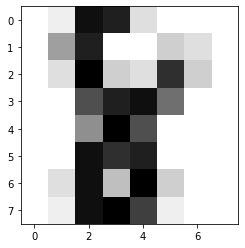

In [ ]:
X_second = X_test[1].reshape(8,8)
print(X_second.shape, "\n")

print(f"The second prediction is a: {y_pred2[1]}", "\n")
print(f"The corresponding image is a: ")
plt.imshow(X_second, cmap='binary', interpolation='nearest')

## WOOOOW, the prediction is right! KNN, with k=3 did a great job!

## Congrats! You did it! You officially completed our Python workshop series. We hope that enjoyed it as much as we did. 

![great](img/great.jpg)


### Learning to program can be very challenging in the beginning (like everything, lol). But with the concepts and tools, we introduced, you should be able to tackle your own challenges.

### In the upcoming months, we will sent you a feedback form. We would love to hear your feedback in order to improve this workshop series as much as possible. 

#### Until then...Don't forget: https://www.youtube.com/watch?v=SJUhlRoBL8M

# Additional info about ML (Regression)

In order to give you also a notion about regression tasks, we quickly introduce Linear Regression. This model is very popular and quite efficient in its prediction. Of course, it has its limitations. Run the example by your own and see how you can use Machine Learning for a real value prediction task

## Linear Regression

In this first use case, we will predict the y value given, some x coordinates. First, we download the linear model from sklearn. We also download the train_test_split and the r2_score functions.

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score

In [ ]:
np.random.seed(0) # Just generates a random set of variables

n = 100 # Number of data points
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

# Let's have quick look at the data dimensions
print("Orignal data")
print(x.shape)
print(y.shape, "\n")

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0) # Train_test_plit function

# Okay, how did the dimensions change
print("After train / test split")
print(X_train.shape)
print(y_train.shape, "\n")

# Necessary reshaping for later data manipulation
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

print("Properly reshaped")
print(X_train.shape)
print(y_train.shape)

Orignal data
(100,)
(100,) 

After train / test split
(75,)
(75,) 

Properly reshaped
(75, 1)
(75, 1)


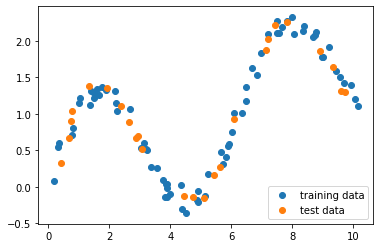

In [ ]:
# Let us plot the data
def plot_data():
    plt.figure()
    plt.scatter(X_train, y_train, label='training data')
    plt.scatter(X_test, y_test, label='test data')
    plt.legend(loc=4);
    
plot_data()

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

Coefficients:  [[0.13581932]] 

Mean squared error: 0.4133443630568711 

R2 score: 0.18547992713474992 



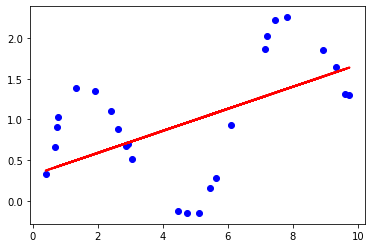

In [ ]:
# The coefficients
print('Coefficients: ', regr.coef_,  "\n")

# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}",  "\n")

# Explained variance score: 1 is perfect prediction
print(f"R2 score: {r2_score(y_test, y_pred)}",   "\n")

# Plot outputs
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)

plt.show()


### Quiz: Is this underfitting or overfitting?

In [ ]:
# Underfitting